# **TUGAS PAGE RANK**

## Pagerank
**PageRank** adalah algoritma yang digunakan oleh mesin pencari, terutama oleh Google, untuk menilai dan memberikan peringkat pada halaman web dalam hasil pencarian. Algoritma ini dikembangkan oleh Larry Page dan Sergey Brin, pendiri Google, dan dinamakan setelah nama Larry Page. PageRank mengukur otoritas atau kepentingan suatu halaman web berdasarkan seberapa banyak halaman lain yang mengaitkan ke halaman tersebut dan seberapa pentingnya halaman-halaman yang memberikan tautan tersebut.

Dalam kasus kali ini PageRank mengukur otoritas atau kepentingan suatu kata berdasarkan seberapa banyak kata lain yang mengaitkan ke kata tersebut dan seberapa pentingnya kata-kata yang memberikan tautan tersebut.

### **Algoritma Pagerank**


1.   Identifikasi kata-kata yang akan dievaluasi.
2.   Buat graph antar kata dengan tautan antar kata.
3.   Inisialisasi pagerank, Setiap halaman web diberikan nilai awal PageRank yang sama.
4.   Kemudian lakukan iterasi perhitungan pagerank.

**Rumus Pagerank :**

$\text{PR(A)}=\frac{d}{N} + \left( 1 - d\right)\left( \sum_{}^{} \frac{\text{Rank(i)}}{Outlink(i)} \right)$



*   PR(i) adalah PageRank dari kata A
*   d adalah faktor damping (biasanya 0.85 untuk Google PageRank)
*   N adalah jumlah total kata


# Import dan Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/OvadillaAisyahRahma/ppw/main/kompasberita.csv')

In [3]:
df

,Judul,Isi,Label
0,PKS Sebut Kritik Anies soal Proyek IKN Sejalan...,KOMPAS.com - Juru Bicara (Jubir) Partai Keadil...,Politik
1,"PKS Sebut Jakarta Masih Layak Jadi Ibu Kota, P...",KOMPAS.com - Pengamat tata kota Universitas Tr...,Politik
2,Partai Gelora Identifikasi 3 Model Kecurangan ...,NaN,Politik
3,"PKS Sebut Jakarta Masih Layak Jadi Ibu Kota, P...",KOMPAS.com - Pengamat tata kota Universitas Tr...,Politik
4,PKS Sebut Kritik Anies soal Proyek IKN Sejalan...,KOMPAS.com - Juru Bicara (Jubir) Partai Keadil...,Politik
...,...,...,...
586,"Mesin Politik di Sumatera Sudah Panas, Anis Ma...",KOMPAS.com - Ketua Umum Partai Gelombang Rakya...,Politik
587,"Soal Kasus Aiman, TPN Ganjar-Mahfud: Kebebasan...","JAKARTA, KOMPAS.com - Wakil Direktur Hukum dan...",Nasional
588,"Mesin Politik di Sumatera Sudah Panas, Anis Ma...",KOMPAS.com - Ketua Umum Partai Gelombang Rakya...,Politik
589,"Jokowi Sebut Indonesia Bangsa Harmonis, Perbed...","JAKARTA, KOMPAS.com - Presiden Joko Widodo men...",Nasional


# Cleaning

In [4]:
import re, string

# Text Cleaning
def cleaning(text):
    # Menghapus tag HTML
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Mengubah seluruh teks menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi pada teks
    text = text.strip()

    # Menghapus Tanda Baca, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("â½ïgoal", "", text)
    text = re.sub("SCROLL TO CONTINUE WITH CONTENT", "", text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)


    # Menghapus Nomor
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text yang berisi 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [5]:
df['Isi'] = df['Isi'].apply(lambda x: cleaning(x))

# Tokenisasi

In [6]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('popular')

from nltk.corpus import stopwords
from itertools import chain
nltk.download('stopwords')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [7]:
df['isi_tokens'] = df['Isi'].apply(lambda x: word_tokenize(x))
df[["Isi", "isi_tokens"]].head()

,Isi,isi_tokens
0,kompas com juru bicara jubir partai keadilan s...,"[kompas, com, juru, bicara, jubir, partai, kea..."
1,kompas com pengamat tata kota universitas tris...,"[kompas, com, pengamat, tata, kota, universita..."
2,,[]
3,kompas com pengamat tata kota universitas tris...,"[kompas, com, pengamat, tata, kota, universita..."
4,kompas com juru bicara jubir partai keadilan s...,"[kompas, com, juru, bicara, jubir, partai, kea..."


## Stopword

In [8]:
stop_words = set(chain(stopwords.words('indonesian')))
df['isi_tokens'] = df['isi_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

In [9]:
df['Isi'] = df['isi_tokens'].apply(lambda tokens: ' '.join(tokens))

In [10]:
df.head()

,Judul,Isi,Label,isi_tokens
0,PKS Sebut Kritik Anies soal Proyek IKN Sejalan...,kompas com juru bicara jubir partai keadilan s...,Politik,"[kompas, com, juru, bicara, jubir, partai, kea..."
1,"PKS Sebut Jakarta Masih Layak Jadi Ibu Kota, P...",kompas com pengamat tata kota universitas tris...,Politik,"[kompas, com, pengamat, tata, kota, universita..."
2,Partai Gelora Identifikasi 3 Model Kecurangan ...,,Politik,[]
3,"PKS Sebut Jakarta Masih Layak Jadi Ibu Kota, P...",kompas com pengamat tata kota universitas tris...,Politik,"[kompas, com, pengamat, tata, kota, universita..."
4,PKS Sebut Kritik Anies soal Proyek IKN Sejalan...,kompas com juru bicara jubir partai keadilan s...,Politik,"[kompas, com, juru, bicara, jubir, partai, kea..."


# Co-Occurency Matriks

In [11]:
df['Isi'][0]

'kompas com juru bicara jubir partai keadilan sejahtera pks muhammad kholid memandang kritik calon presiden capres nomor urut anies baswedan kota negara ikn nusantara sejalan pandangan partainya alasan memindahkan kota pemerataan pemerataan ekonomi memindahkan kota membangun pusat pertumbuhan ekonomi sesuai keunggulan daya saing wilayah siaran pers diterima kompas com kamis pemerataan pembangu membesarkan kota kota terbangun baca presiden terbitkan aturan cuti menteri wali kota kampanyetak membesarkan menaikkan kelas kota kota kota menengah kota menengah kota kota kota maju motor pertumbuhan ekonomi imbuh calon legislatif caleg dewan perwakilan rakyat dpr republik indonesia ri daerah pemilihan dapil depok bekasi kholid dana desa dd stimulus pembangu desa pembangu desa menyejahterakan warga baca mobilisasi aparat desa zaman orba pengamat ui era otoriteralumnus universitas indonesia ui memandang pemindahan kota dirancang matang tergesa gesa pemindahan kota kholid mengkaji dampaknya kompr

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
X = vectorizer.fit_transform([df['Isi'][0]])

co_occurrence_matrix = (X.T * X)
co_occurrence_matrix.setdiag(0)

co_occurrence_df = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
co_occurrence_df

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,alasan,anies,aparat,aspek,aturan,baca,baswedan,bekasi,bicara,buka,...,terbitkan,terburu,tergesa,ui,universitas,urut,wali,warga,wilayah,zaman
alasan,0,1,1,1,2,3,1,1,1,1,...,1,2,1,2,1,1,1,1,1,1
anies,1,0,1,1,2,3,1,1,1,1,...,1,2,1,2,1,1,1,1,1,1
aparat,1,1,0,1,2,3,1,1,1,1,...,1,2,1,2,1,1,1,1,1,1
aspek,1,1,1,0,2,3,1,1,1,1,...,1,2,1,2,1,1,1,1,1,1
aturan,2,2,2,2,0,6,2,2,2,2,...,2,4,2,4,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
urut,1,1,1,1,2,3,1,1,1,1,...,1,2,1,2,1,0,1,1,1,1
wali,1,1,1,1,2,3,1,1,1,1,...,1,2,1,2,1,1,0,1,1,1
warga,1,1,1,1,2,3,1,1,1,1,...,1,2,1,2,1,1,1,0,1,1
wilayah,1,1,1,1,2,3,1,1,1,1,...,1,2,1,2,1,1,1,1,0,1


In [13]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
G = nx.DiGraph()
for idx, row in co_occurrence_df.iterrows():
    for col in co_occurrence_df.columns:
        weight = co_occurrence_df.loc[idx, col]
        if weight > 50 and idx != col:
            G.add_edge(idx, col, weight=weight)

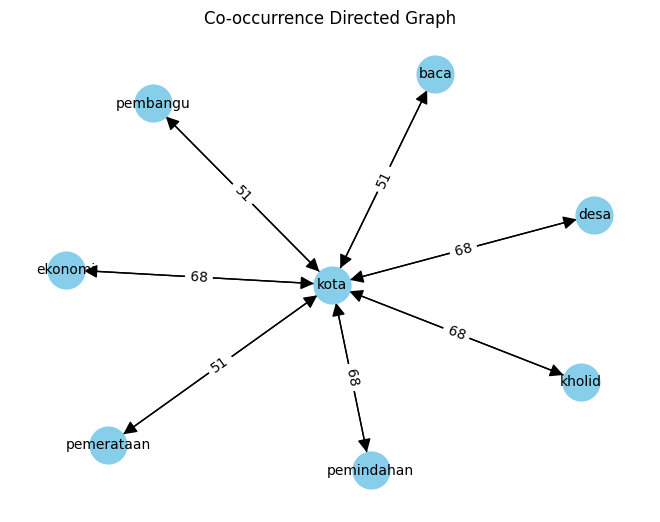

In [14]:
# Menampilkan graf
pos = nx.spring_layout(G)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_color='black', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Co-occurrence Directed Graph")
plt.show()

# Closeness Centrality

In [15]:
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:")
for node, closeness in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {closeness}")

Closeness Centrality:
kota: 1.0
baca: 0.5384615384615384
desa: 0.5384615384615384
ekonomi: 0.5384615384615384
kholid: 0.5384615384615384
pembangu: 0.5384615384615384
pemerataan: 0.5384615384615384
pemindahan: 0.5384615384615384


# Code Page Rank

In [16]:
pagerank = nx.pagerank(G)
print("\nPageRank:")
for node, rank in sorted(pagerank.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {rank}")


PageRank:
kota: 0.46959634737653244
desa: 0.08261458441975475
ekonomi: 0.08261458441975475
kholid: 0.08261458441975475
pemindahan: 0.08261458441975475
baca: 0.06664843831481607
pembangu: 0.06664843831481607
pemerataan: 0.06664843831481607


In [17]:
df['Isi'][0]

'kompas com juru bicara jubir partai keadilan sejahtera pks muhammad kholid memandang kritik calon presiden capres nomor urut anies baswedan kota negara ikn nusantara sejalan pandangan partainya alasan memindahkan kota pemerataan pemerataan ekonomi memindahkan kota membangun pusat pertumbuhan ekonomi sesuai keunggulan daya saing wilayah siaran pers diterima kompas com kamis pemerataan pembangu membesarkan kota kota terbangun baca presiden terbitkan aturan cuti menteri wali kota kampanyetak membesarkan menaikkan kelas kota kota kota menengah kota menengah kota kota kota maju motor pertumbuhan ekonomi imbuh calon legislatif caleg dewan perwakilan rakyat dpr republik indonesia ri daerah pemilihan dapil depok bekasi kholid dana desa dd stimulus pembangu desa pembangu desa menyejahterakan warga baca mobilisasi aparat desa zaman orba pengamat ui era otoriteralumnus universitas indonesia ui memandang pemindahan kota dirancang matang tergesa gesa pemindahan kota kholid mengkaji dampaknya kompr

# Ranking Kata Penting

Rangking kata penting ini diperoleh dari centrality

In [18]:
ranking_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Kata Kunci dari berita diatas menggunakan closeness berdasarkan urutan (Rank):")
for i, (node, closeness) in enumerate(ranking_closeness, 1):
    print(f"Rank {i}: {node} nilai closeness {closeness}")

Kata Kunci dari berita diatas menggunakan closeness berdasarkan urutan (Rank):
Rank 1: kota nilai closeness 1.0
Rank 2: baca nilai closeness 0.5384615384615384
Rank 3: desa nilai closeness 0.5384615384615384
Rank 4: ekonomi nilai closeness 0.5384615384615384
Rank 5: kholid nilai closeness 0.5384615384615384
Rank 6: pembangu nilai closeness 0.5384615384615384
Rank 7: pemerataan nilai closeness 0.5384615384615384
Rank 8: pemindahan nilai closeness 0.5384615384615384


In [19]:
ranking_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]
print("Kata Kunci dari berita diatas menggunakan pagerank berdasarkan urutan (Rank):")
for i, (node, pagerank) in enumerate(ranking_pagerank, 1):
    print(f"Rank {i}: {node} nilai Pagerank {pagerank}")

Kata Kunci dari berita diatas menggunakan pagerank berdasarkan urutan (Rank):
Rank 1: kota nilai Pagerank 0.46959634737653244
Rank 2: desa nilai Pagerank 0.08261458441975475
Rank 3: ekonomi nilai Pagerank 0.08261458441975475
Rank 4: kholid nilai Pagerank 0.08261458441975475
Rank 5: pemindahan nilai Pagerank 0.08261458441975475
Rank 6: baca nilai Pagerank 0.06664843831481607
Rank 7: pembangu nilai Pagerank 0.06664843831481607
Rank 8: pemerataan nilai Pagerank 0.06664843831481607
